In [1]:
from cloudpathlib import S3Path, S3Client
from pathlib import Path

# Set up our cache path:
cache_path = Path('/tmp/cache')
if not cache_path.exists():
    cache_path.mkdir()

# Create the root S3Path for the HCP1200 Dataset:
hcp_base_path = S3Path(
    's3://open-neurodata/rokem/hcp1200/afq',
    client=S3Client(
        no_sign_request=True,
        local_cache_dir=cache_path))

openneuro = S3Path(
    's3://open-neurodata',
    client=S3Client(
        no_sign_request=True,
        local_cache_dir=cache_path))

In [2]:
# Let's see if it looks like a BIDS dataset!

from utilities import ls, crawl



In [3]:
sub = '100206'
sub_path = hcp_base_path / f'sub-{sub}'
# ls(sub_path / 'ses-01')

img_path = sub_path / f'ses-01/sub-{sub}_dwi_b0.nii.gz'
# test_img = 's3://open-neurodata/rokem/hcp1200/afq/sub-100206/ses-01/sub-100206_dwi_b0.nii.gz'

In [4]:
# If we want to load one of these files into nibabel, we can convert it
# into a filesystem path (cloudpaths cannot just be passed to nibabel).

import nibabel as nib
from nilearn import plotting

brain_img = nib.load(img_path.fspath)

## plot interactive Nifti images
### a DWI B0 img (from rokem bucket)

/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



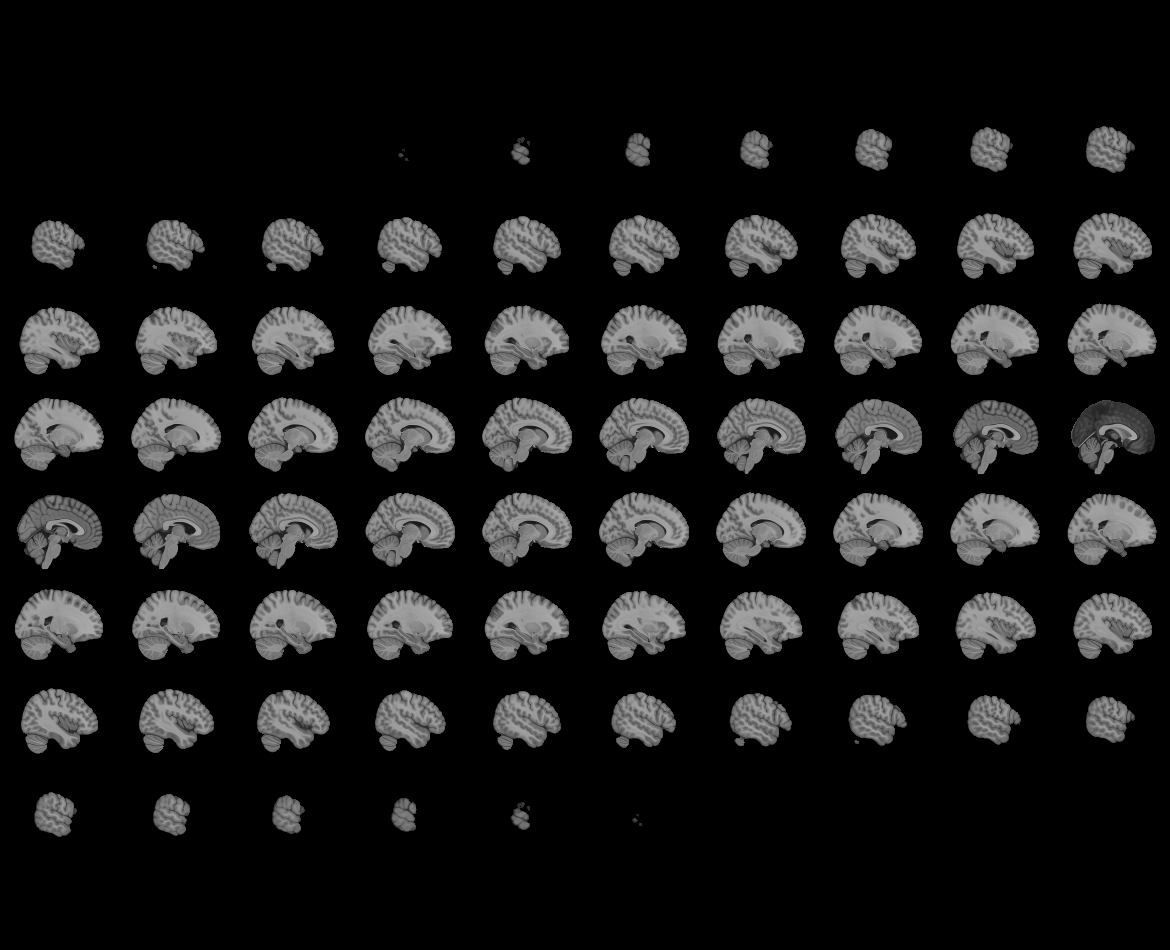
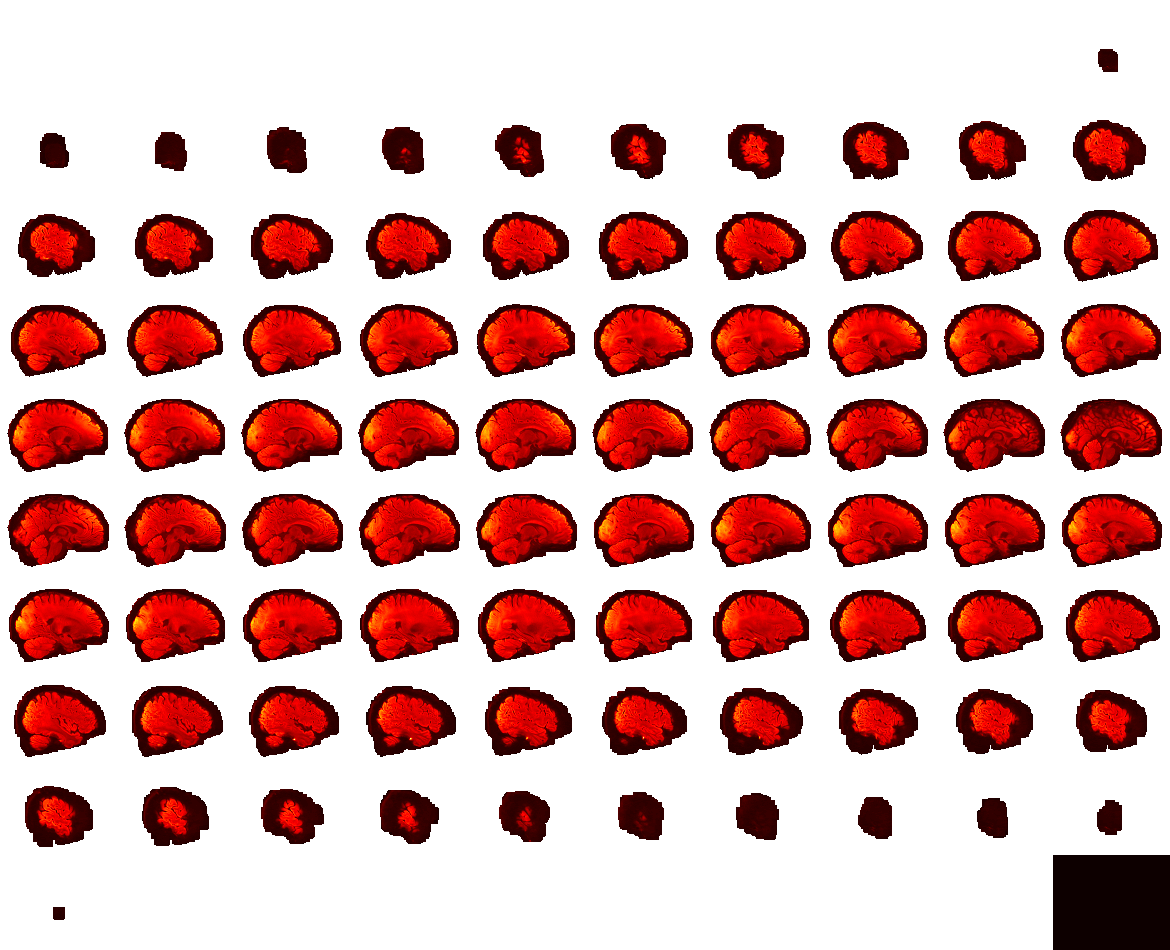

In [5]:
view = plotting.view_img(brain_img, threshold=3)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

### the same subject's T1w image aligned to MNI space (from hcp1200 bucket)

/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



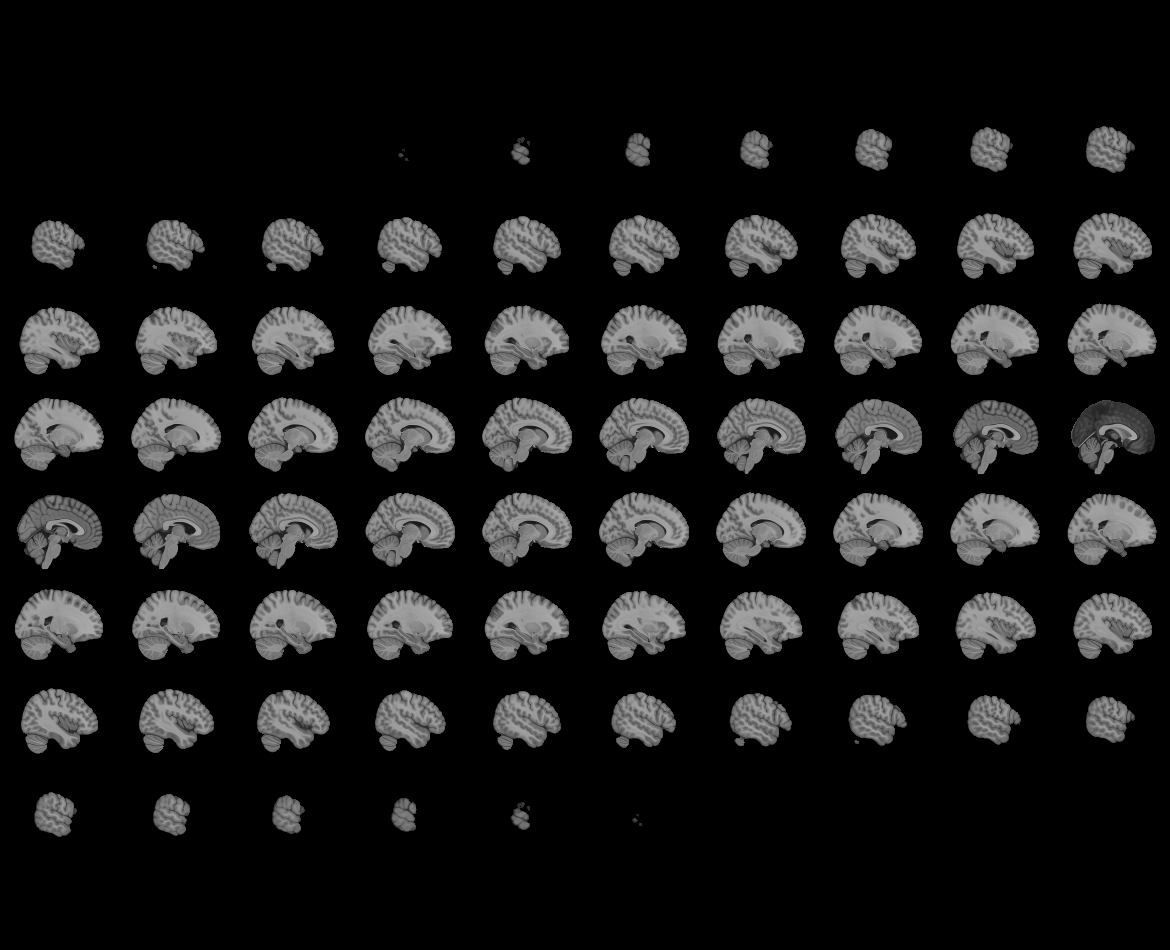
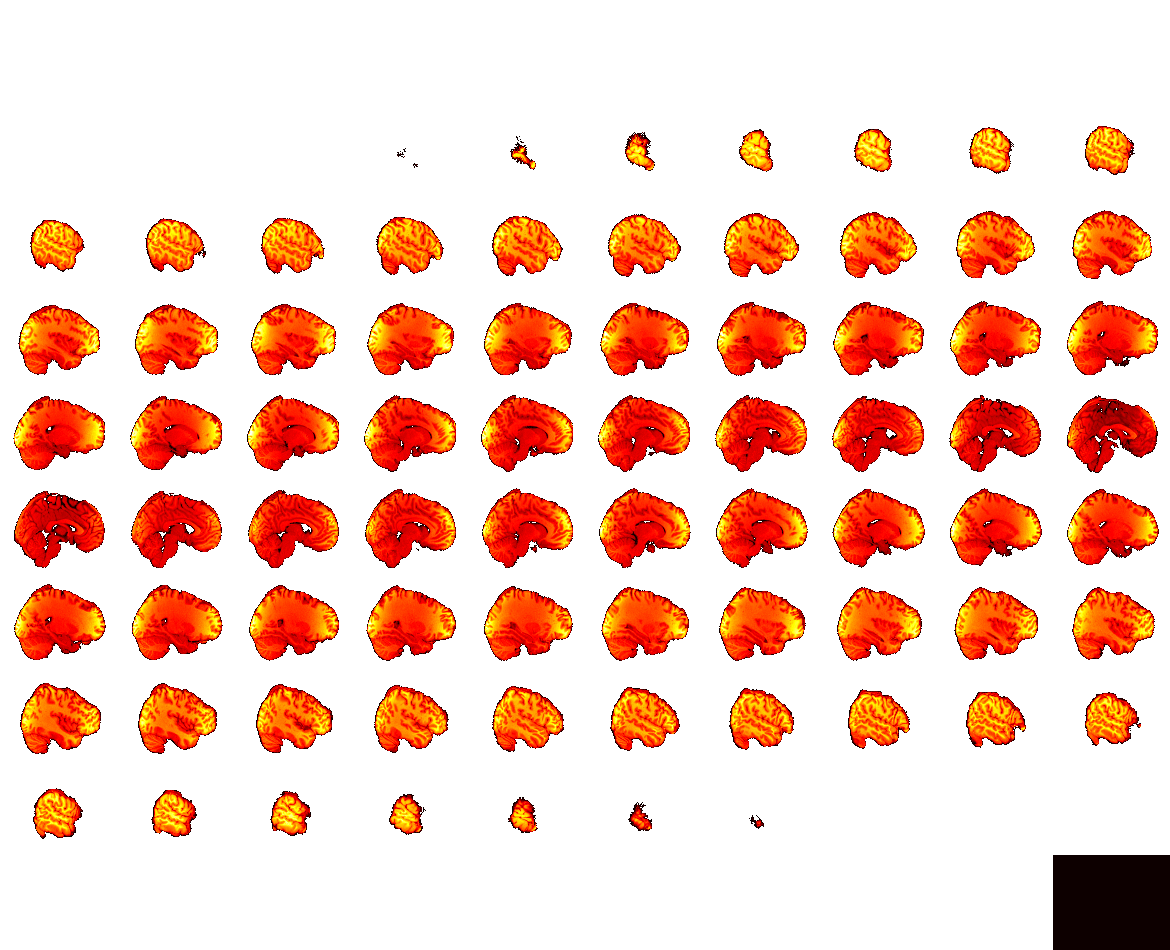

In [6]:
anat_dir = openneuro / 'hcp1200' / f'sub-{sub}' / 'ses-1' / 'anat' / 'preproc'
anat_img_path = anat_dir / 't1w_aligned_mni.nii.gz'

view = plotting.view_img(anat_img_path)
view

## Plotting png images in this (hcp1200) bucket
### connectome matrices

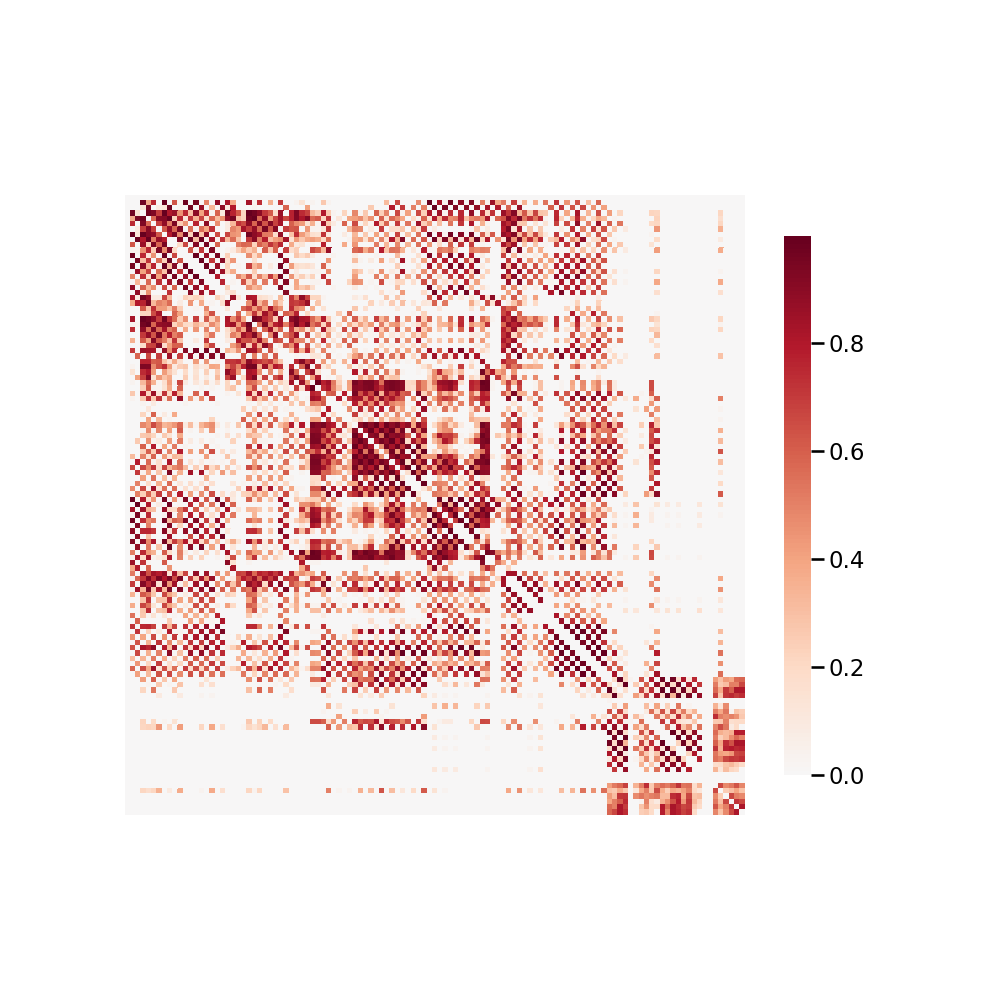

In [7]:
from IPython.display import Image

# display exemplary connectome matrix png
connectome_png_path = openneuro / 'hcp1200' / f'sub-{sub}'/ 'ses-1' / 'qa' / 'graphs_plotting' / 'sub-100206_ses-1_run-1_dwi_AAL_space-MNI152NLin6_res-1x1x1_connectome.png'
Image(filename=connectome_png_path) 


### bet images

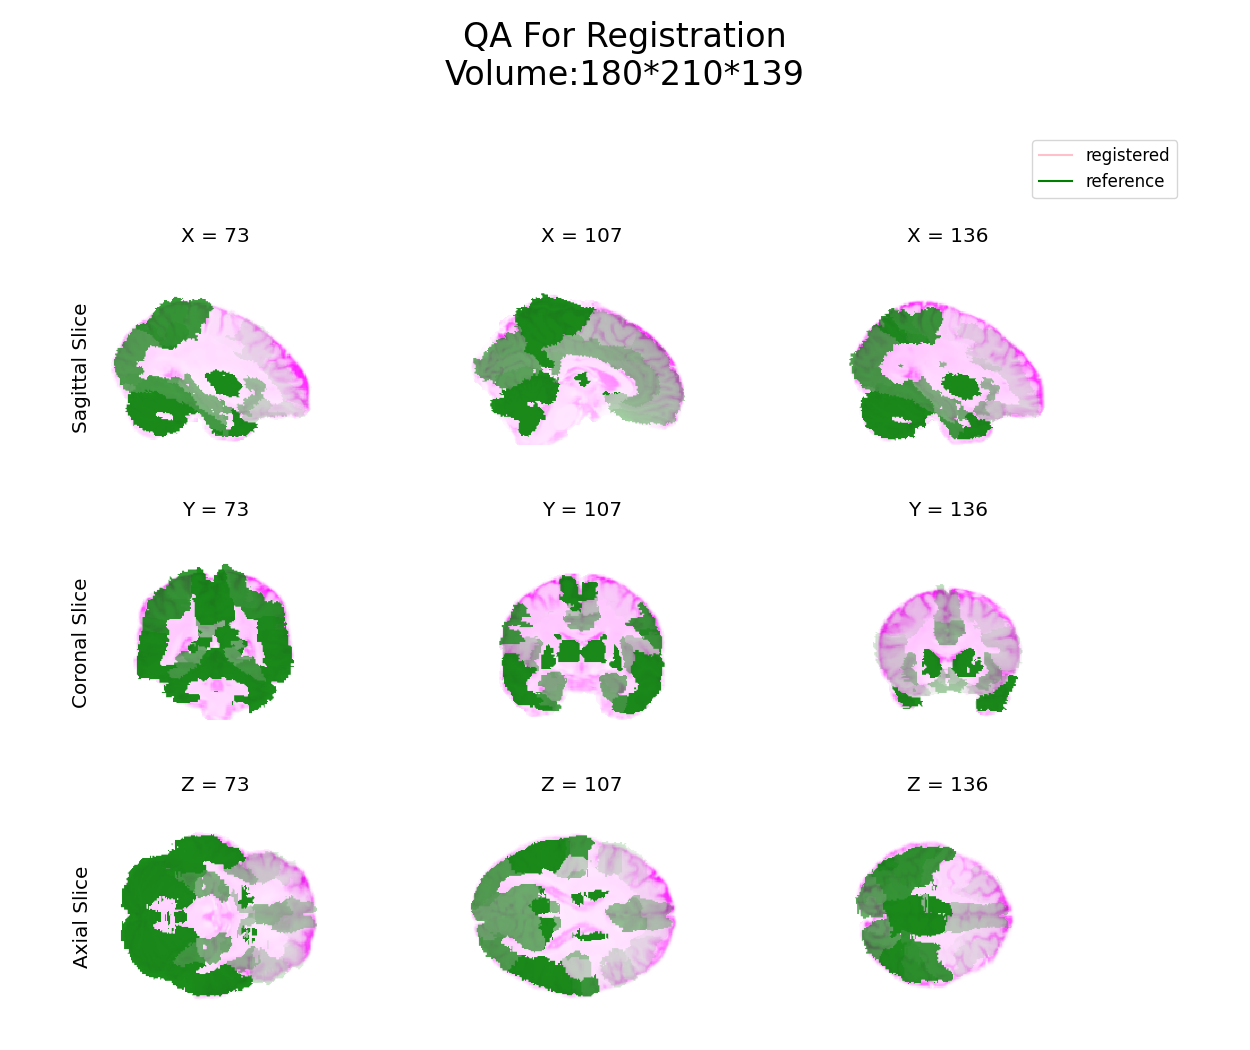

In [8]:
# display exemplary bet png
bet_png_path = openneuro / 'hcp1200' / f'sub-{sub}'/ 'ses-1' / 'qa' / 'reg' / 'AAL_space-MNI152NLin6_res-1x1x1_reor_RAS_nores_aligned_atlas_2_nodif_B0_bet.png'
Image(filename=bet_png_path) 


## more images (from rokem bucket)
unsure what exactly these are showing

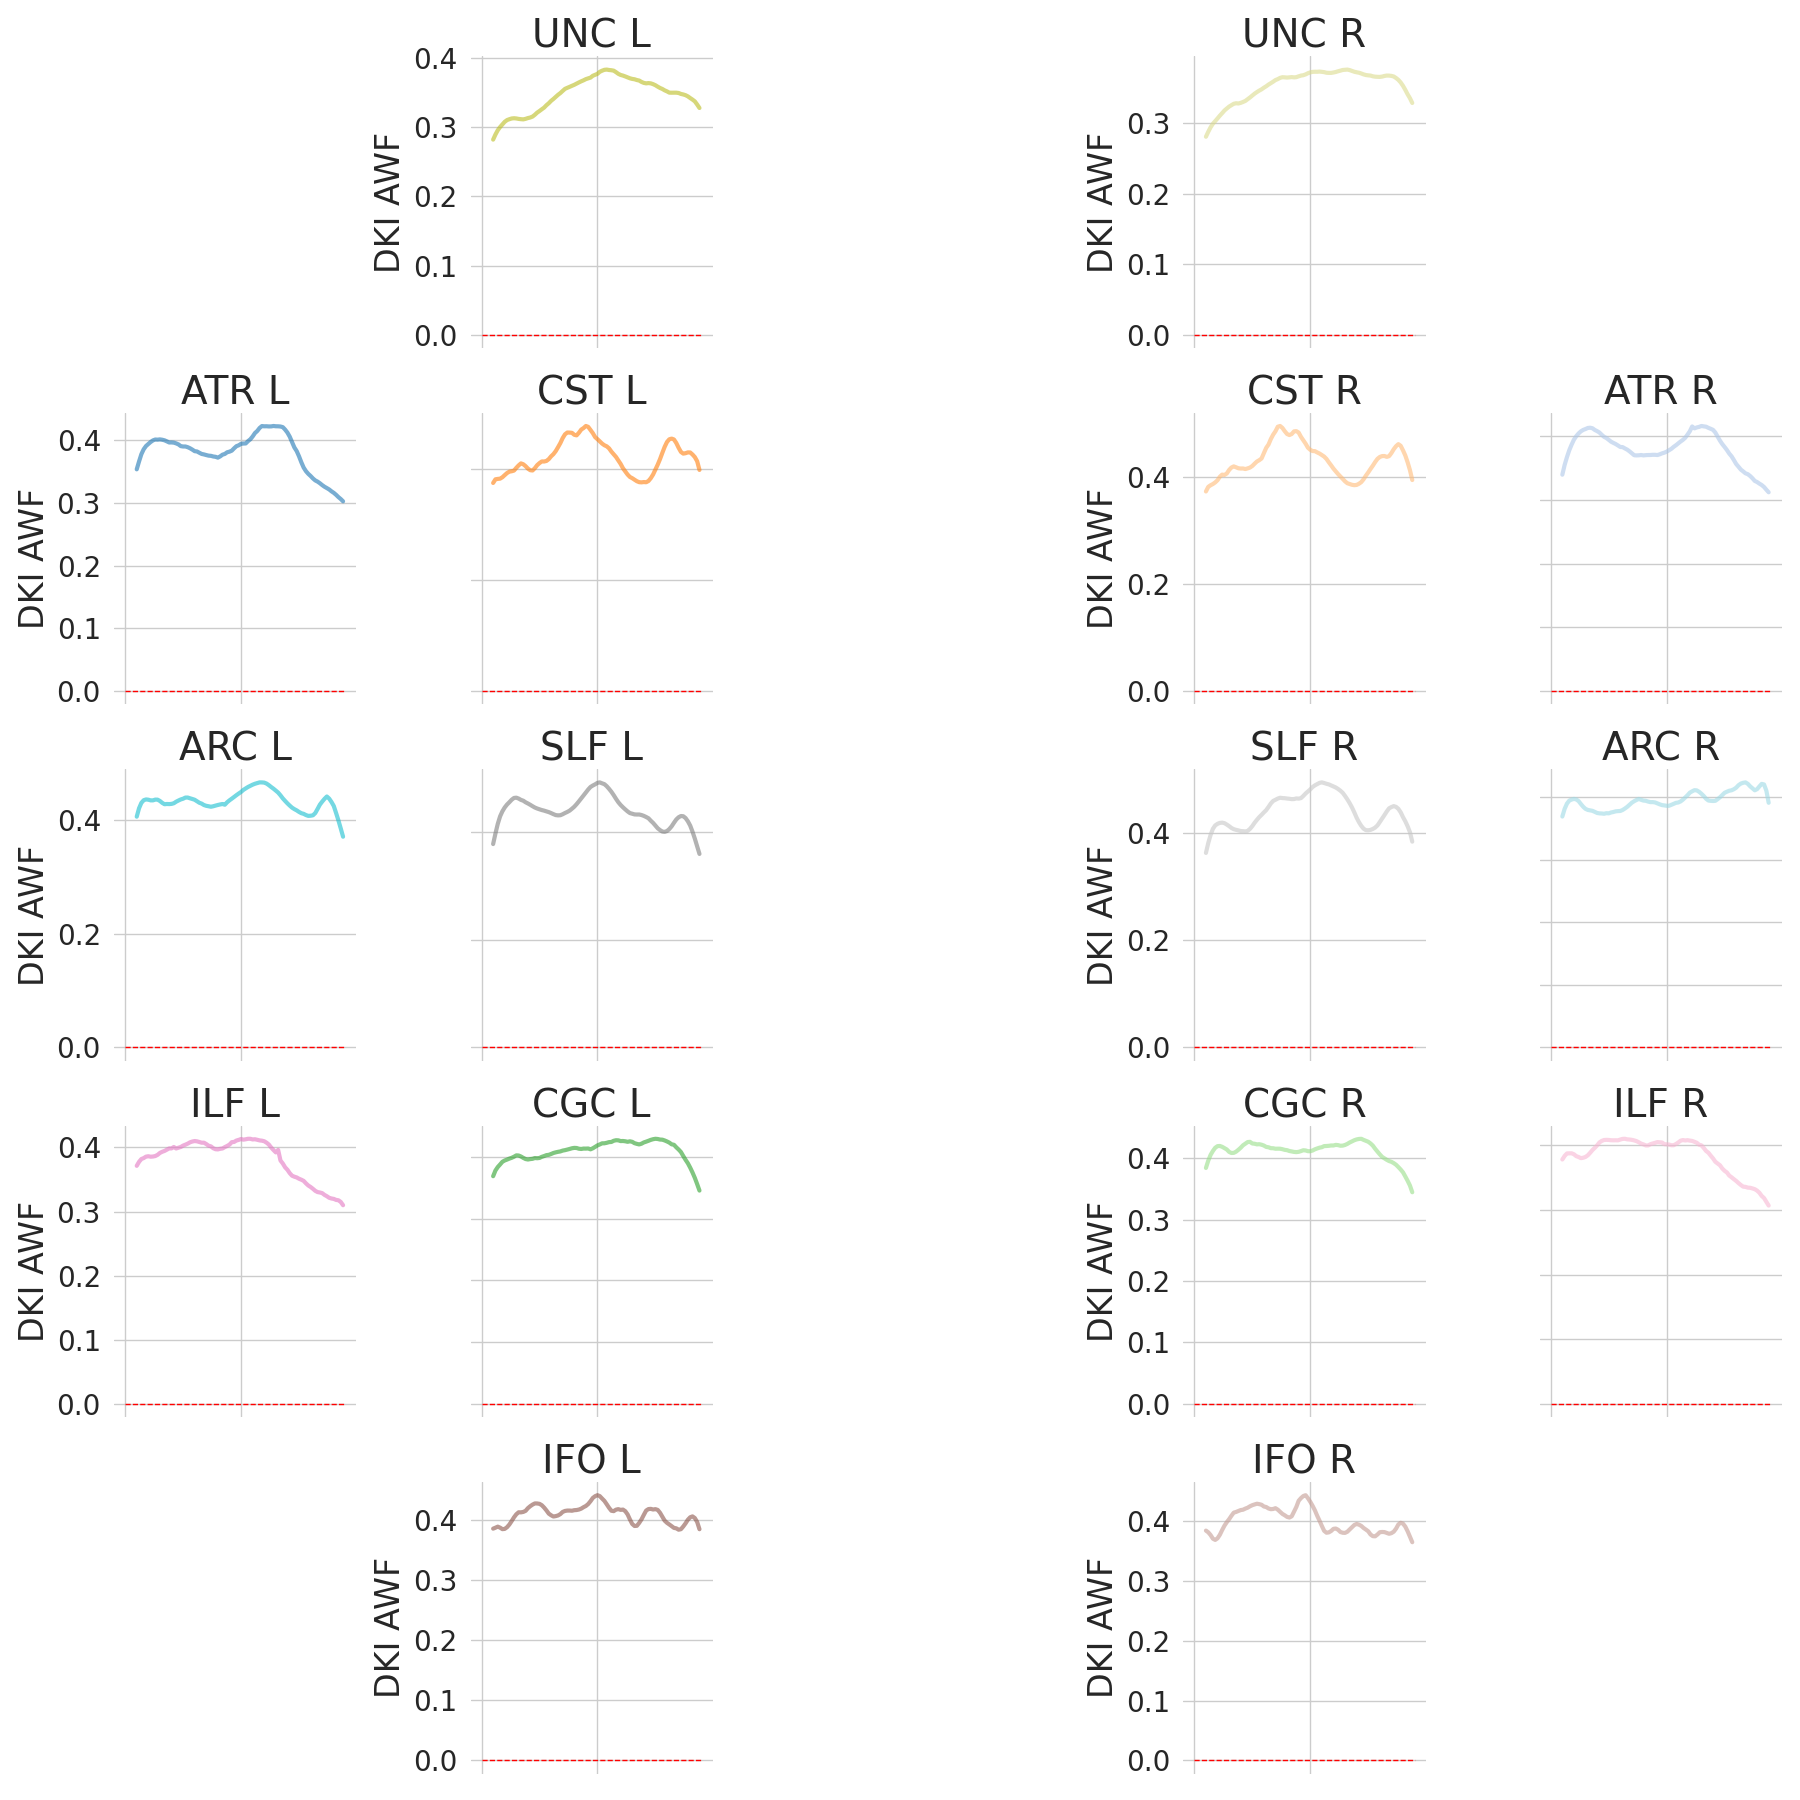

In [9]:
img_path = sub_path / 'ses-01' / f'sub-{sub}_dwi_space-RASMM_model-CSD_desc-prob-afq_dki_awf_profile_plots.png'
Image(filename=img_path)


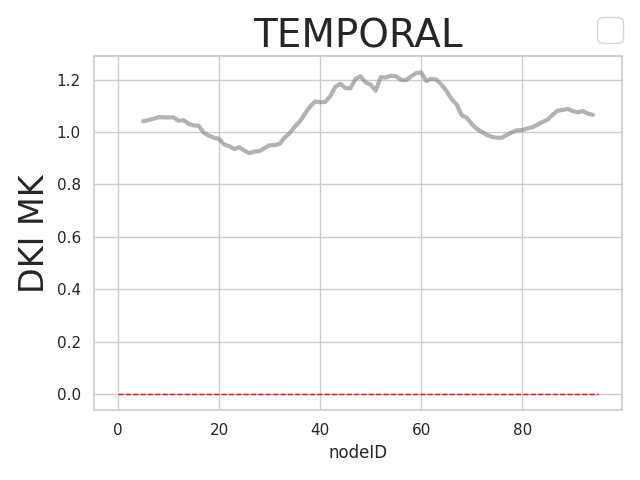

In [10]:
img_path = sub_path / 'ses-01' / f'sub-{sub}_dwi_space-RASMM_model-CSD_desc-prob-afq_dki_mk_profile_plots_Temporal.png'
Image(filename=img_path)


In [12]:
crawl(sub_path)
# ls(sub_path / 'ses-01' / 'sub-100206_dwi_space-RASMM_model-CSD_desc-prob-afq_dki_awf_profile_plots.png')
# ls(sub_path / 'ses-01')
crawl(openneuro / 'hcp1200' / 'sub-100206' / 'ses-1')

sub-100206
   ses-01
      ROIs
         sub-100206_dwi_desc-ROI-ARC_L-1-include.json
         sub-100206_dwi_desc-ROI-ARC_L-1-include.nii.gz
         sub-100206_dwi_desc-ROI-ARC_L-2-include.json
         sub-100206_dwi_desc-ROI-ARC_L-2-include.nii.gz
         sub-100206_dwi_desc-ROI-ARC_R-1-include.json
         sub-100206_dwi_desc-ROI-ARC_R-1-include.nii.gz
         sub-100206_dwi_desc-ROI-ARC_R-2-include.json
         sub-100206_dwi_desc-ROI-ARC_R-2-include.nii.gz
         sub-100206_dwi_desc-ROI-ATR_L-1-include.json
         sub-100206_dwi_desc-ROI-ATR_L-1-include.nii.gz
         sub-100206_dwi_desc-ROI-ATR_L-2-include.json
         sub-100206_dwi_desc-ROI-ATR_L-2-include.nii.gz
         sub-100206_dwi_desc-ROI-ATR_R-1-include.json
         sub-100206_dwi_desc-ROI-ATR_R-1-include.nii.gz
         sub-100206_dwi_desc-ROI-ATR_R-2-include.json
         sub-100206_dwi_desc-ROI-ATR_R-2-include.nii.gz
         sub-100206_dwi_desc-ROI-AntFrontal-1-include.json
         sub-100206_dwi_desc-